# Isolevel in one cube:

In [8]:
# Cube array dimensions: shape = (dim 0, dim 1, dim2)
#      dim 0 (Z)
#        ^
#        |
#      4 +------+ 5
#       /|     /|
#      / |    / |
#   6 +------+ 7|
#     |  |   |  |
#     |0 +---|--+ 1 -> dim 2 (X)
#     | /    | /
#     |/     |/
#   2 +------+ 3
#    /
#   dim 1 (Y)

If we want to create the following mesh 
![larger-iso-surface-using-silx-plot3d](img/simpleCube.png)

In [2]:
%gui qt
from silx.math import marchingcubes
import numpy

If we want to affect the following iso values to vertices :
      dim 0 (Z)
        ^
        |
      1 +------+ 1
       /|     /|
      / |    / |
   1 +------+ 1|
     |  |   |  |
     |0 +---|--+ 0 -> dim 2 (X)
     | /    | /
     |/     |/
   0 +------+ 0
    /
   dim 1 (Y)

In [3]:
cube = numpy.array(
            (((0., 0.), (0., 0.)),
             ((1., 1.), (1., 1.))), dtype=numpy.float32)

Question : what are we giving a tuple of tuple(2) and not simply a tuple ?

In [4]:
vertices, normals, indices = marchingcubes.MarchingCubes(cube, isolevel=0.2)

vertices: vertices of the mesh
normals:normals at each vertex
indices: triangle indices of the vertices composing the mesh

Display the result (using matlab for now...)

In [5]:
%gui qt

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def plotMesh(_vertices):
    import numpy
    from matplotlib.collections import PolyCollection
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # draw ref
    ax.plot((0, 1),(0, 0),(0, 0))
    ax.plot((0, 0),(0, 1),(0, 0))
    ax.plot((0, 0),(0, 0),(0, 1))

    # draw the points created
    x=[]
    y=[]
    z=[]
    for vertice in _vertices:
        x.append(vertice[2])
        y.append(vertice[1])
        z.append(vertice[0])

    x=numpy.array(x)
    y=numpy.array(y)
    z=numpy.array(z)

    x, y = numpy.meshgrid(x, y)

    ax.plot_surface(x, y, z, color='orange')

    ax.set_xlabel('dim2 (x)')
    ax.set_ylabel('dim1 (y)')
    ax.set_zlabel('dim0 (z)')
    plt.show()

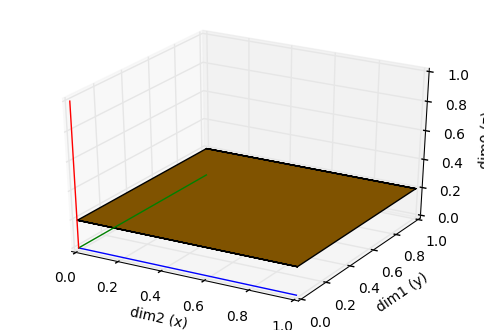

In [15]:
plotMesh(vertices)

Now you can play with the vertices iso values and isolevel to see what appends

# Isosurface with many cubes
## exercice : display some more data

Here is an example of a larger dataset
![larger-iso-surface-using-silx-plot3d](img/isosurface.png)

load and observe the file cube.h5

### damien data

In [17]:
from silx.gui.hdf5 import Hdf5TreeView

In [18]:
dataPath='data/cube.h5'

data info: first dimension is the detector position, then dimension 2 to 4 are the values in the reciproque space. Data from ID01

In [19]:
viewer=Hdf5TreeView()
viewer.findHdf5TreeModel().insertFile(dataPath)
viewer.show()

Here we have a matrice filed of cubes 28x150x60

In [20]:
import h5py
#select the cube values:
f=h5py.File(dataPath)
# then select the 'Data/qspace' datagroup (array containing the cubes of the isosurface )
data=f['Data']['qspace'][0]
data = numpy.array(data, order='C', dtype='float32')

Question : pourquoi N cubes, que representent ils ?

In [135]:
data=numpy.array(
            data, dtype=numpy.float32, order='C')
vertices, normals, indices=marchingcubes.MarchingCubes(data, isolevel=0.2)

### Thomas data

![larger-iso-surface-using-silx-plot3d](img/marchingCubesThomas.png)

# To come :
visualization with plot3d